<h1><center><b><u>Group By</h1></center></b></u>


<h2><u>Group By:</h2></u>

The SQL GROUP BY clause is used in collaboration with the SELECT statement to arrange identical data into groups. This GROUP BY clause follows the WHERE clause in a SELECT statement and precedes the ORDER BY clause.

<u>Syntax:</u>

SELECT column1, column2
FROM table_name
WHERE [ conditions ]
GROUP BY column1, column2
ORDER BY column1, column2

![](https://learnsql.com/blog/group-by-in-sql-explained/GROUP_BY-avg.jpg)

<h2><u>Aggregate functions:</h2></u>

Aggregate functions are functions that are performed over one or more values and return a single value. When an aggregate function is used along with a GROUP BY clause, it can return one or more values. 

![](https://static.javatpoint.com/dbms/images/dbms-sql-aggregate-functio.png)

The five aggregate functions that we can use with the SQL Order By statement are:

AVG(): Calculates the average of the set of values.<br>
COUNT(): Returns the count of rows.<br>
SUM(): Calculates the arithmetic sum of the set of numeric values.<br>
![](https://www.mysqltutorial.org/wp-content/uploads/2019/09/MySQL-Aggregate-Function.png)<br>
MAX(): From a group of values, returns the maximum value.<br>
MIN(): From a group of values, returns the minimum value.<br>

Refer: https://www.w3schools.com/sql/sql_groupby.asp#:~:text=The%20GROUP%20BY%20statement%20groups,by%20one%20or%20more%20columns.


### Now lets begin with the implementation of queries.

**In this assignment we will be using the DVD sales Schema having 4 tables. Given Below is the schema of the same.**

!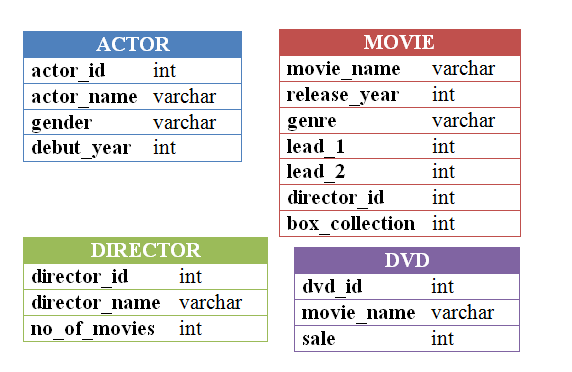

In [2]:
!pip install SQLAlchemy==1.4.46

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.9 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.9
    Uninstalling SQLAlchemy-2.0.9:
      Successfully uninstalled SQLAlchemy-2.0.9


In [1]:
import sqlite3
sql=sqlite3.connect('group_by1.db')
%load_ext sql
%sql sqlite:///group_by1.db

###**NOW WE WILL CREATE TABLES AND INSERT DATA**
##### **RUN NEXT 5 CELLS TO CREATE TABLE AND INSERT DATA**

In [2]:
%%sql
CREATE TABLE Actor(Actor_ID int(2),Actor_name varchar(30),Gender varchar(10),debut_year int(5));
CREATE TABLE Director(Director_ID int(2),Director_name varchar(30),no_of_movies int(10));
CREATE TABLE Movie(Movie_name varchar(30),release_year int(5),genre varchar(15),lead_1 int(2),lead_2 int(2),director_id int(2),box_collection int(10) );
CREATE TABLE DVD(DVD_id int(2),Movie_name varchar(30),sale int(10));

 * sqlite:///group_by1.db
Done.
Done.
Done.
Done.


[]

In [3]:
%%sql
insert into actor values(1,'Aamir Khan','male',1988);
insert into actor values(2,'Shahrukh Khan','male',1992);
insert into actor values(3,'Kareena Kapoor','female',2000);
insert into actor values(4,'Kajol','female',1992);
insert into actor values(5,'Anushka Sharma','female',2008);
insert into actor values(6,'Ranbir Kapoor','male',2007);
insert into actor values(7,'Alia Bhatt','female',2012);
insert into actor values(8,'Ranveer Singh','male',2010);
insert into actor values(9,'Deepika Padukone','female',2006);
insert into actor values(10,'Shahid Kapoor','male',2003);
insert into actor values(11,'Katrina Kaif','female',2003);
insert into actor values(12,'Varun Dhawan','male',2012);


 * sqlite:///group_by1.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [4]:
%%sql
insert into director values(1,'Rajkumar Hirani',10);
insert into director values(2,'Sanjay Leela Bhansali',8);
insert into director values(3,'Aditya Chopra',6);
insert into director values(4,'Zoya Akhtar',3);
insert into director values(5,'Imtiaz Ali',5);
insert into director values(6,'Ayan Mukerji',4);
insert into director values(7,'Santosh Sivan',9);
insert into director values(8,'Farah Khan',4);


 * sqlite:///group_by1.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [5]:
%%sql
insert into movie values('3 Idiots',2009,'comedy',1,3,1,989600000);
insert into movie values('PK',2014,'satire',1,5,1,789600000);
insert into movie values('Bajirao Mastani',2015,'historic',8,9,2,68960000);
insert into movie values('Rab ne bana di jodi',2008,'romance',2,5,3,48960000);
insert into movie values('Gully boy',2019,'Musical drama',8,7,4,28950000);
insert into movie values('Jab we met',2007,'romance',10,3,5,18980000);
insert into movie values('Padmavat',2018,'historic',8,9,2,38460000);
insert into movie values('Yeh jawani hai deewani',2013,'romance',6,9,6,581600000);
insert into movie values('Ashoka',2001,'historic',2,3,7,8796000);
insert into movie values('Happy new year',2014,'comedy',2,9,8,68960000);


 * sqlite:///group_by1.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [6]:
%%sql
insert into DVD values(1,'3 Idiots',8890);
insert into DVD values(2,'PK',8790);
insert into DVD values(3,'Bajirao Mastani',6810);
insert into DVD values(4,'Rab ne bana di jodi',7920);
insert into DVD values(5,'Gully boy',870);
insert into DVD values(6,'Jab we met',4792);
insert into DVD values(7,'Padmavat',590);
insert into DVD values(8,'Yeh jawani hai deewani',2890);
insert into DVD values(9,'Ashoka',730);
insert into DVD values(10,'Happy new year',1690);

 * sqlite:///group_by1.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

### NOW YOU CAN BEGIN WITH THE QUERIES.

### 1. Display the count of actors and actresses.



In [7]:
%%sql
select Gender, count(Gender) as number from Actor group by Gender

 * sqlite:///group_by1.db
Done.


Gender,number
female,6
male,6


### 2. Display the count of movies of each genre.


In [8]:
%%sql
select genre,count(Movie_name) as count from Movie group by genre

 * sqlite:///group_by1.db
Done.


genre,count
Musical drama,1
comedy,2
historic,3
romance,3
satire,1


### 3. Calculate the oldest released movie of each genre.


In [9]:
%%sql
select genre,min(release_year) as 'oldest release' from Movie group by genre

 * sqlite:///group_by1.db
Done.


genre,oldest release
Musical drama,2019
comedy,2009
historic,2001
romance,2007
satire,2014


### 4. Calculate the total box office collection for movies of each genre.


In [10]:
%%sql
select genre,sum(box_collection) as 'total box office collection' from Movie group by genre

 * sqlite:///group_by1.db
Done.


genre,total box office collection
Musical drama,28950000
comedy,1058560000
historic,116216000
romance,649540000
satire,789600000


### 5. Display the name of director, current count of movies and total count of movies directed by him/her.

In [22]:
%%sql
select d.Director_name,count(m.director_id) as 'current count',d.no_of_movies as 'total count' from Movie as m,Director as d where d.Director_ID = m.director_id group by Director_name 


 * sqlite:///group_by1.db
Done.


Director_name,current count,total count
Aditya Chopra,1,6
Ayan Mukerji,1,4
Farah Khan,1,4
Imtiaz Ali,1,5
Rajkumar Hirani,2,10
Sanjay Leela Bhansali,2,8
Santosh Sivan,1,9
Zoya Akhtar,1,3


### 6. Display the name of lead_1 actors, their count of movies and their total DVD sales.

In [27]:
%%sql
select a.Actor_name, count(m.lead_1), sum(d.sale) as 'total sales' from Actor as a, Movie as m, DVD as d where a.Actor_ID=m.lead_1 and m.Movie_name=d.Movie_name group by a.Actor_name




 * sqlite:///group_by1.db
Done.


Actor_name,count(m.lead_1),total sales
Aamir Khan,2,17680
Ranbir Kapoor,1,2890
Ranveer Singh,3,8270
Shahid Kapoor,1,4792
Shahrukh Khan,3,10340


<h2><u>Having:</h2></u>

While the GROUP BY Clause groups rows that have the same values into summary rows. The having clause is used with the where clause in order to find rows with certain conditions. The having clause is always used after the group By clause.

<u>Syntax:</u>

SELECT column1, column2
FROM table_name
WHERE [ conditions ]
GROUP BY column1, column2
HAVING [ conditions ]

![](https://www.w3resource.com/w3r_images/sql-having.png)

### 7. Show the release year and number of movies released in each year only if more than 1 movie is released each year.

In [29]:
%%sql
select m.release_year, count(m.release_year) as 'no. of movies' from Movie as m group by m.release_year having count(m.release_year) > 1


 * sqlite:///group_by1.db
Done.


release_year,no. of movies
2014,2


### 8. Display the director name and their total box office collection which should be greater than 50 crores.

In [31]:
%%sql
select d.Director_name, sum(m.box_collection) as 'total box collection' from Director as d, Movie as m where m.director_id=d.Director_ID group by d.Director_name having sum(m.box_collection)>500000000



 * sqlite:///group_by1.db
Done.


Director_name,total box collection
Ayan Mukerji,581600000
Rajkumar Hirani,1779200000


<h2><u>Order By:</h2></u>

The ORDER BY keyword is used to sort the result-set in ascending or descending order.

The ORDER BY keyword sorts the records in ascending order by default. To sort the records in descending order, use the DESC keyword.

<u>Syntax:</u>

SELECT column1, column2
FROM table_name
WHERE [ conditions ]
GROUP BY column1, column2
HAVING [ conditions ]
ORDER BY column1,column2;

![](https://cdn.educba.com/academy/wp-content/uploads/2019/09/ORDER-BY-Clause-in-SQL.png)

### 9. Give the count of movies of each genre in decreasing order of count.

In [34]:
%%sql
select genre, count(Movie_name) as 'count of movie' from Movie group by genre order by count(Movie_name) desc


 * sqlite:///group_by1.db
Done.


genre,count of movie
romance,3
historic,3
comedy,2
satire,1
Musical drama,1


### 10. Sort the movie names based on director names.

In [35]:
%%sql
select d.Director_name, m.Movie_name from Director as d, Movie as m where m.director_id=d.Director_ID order by d.Director_name



 * sqlite:///group_by1.db
Done.


Director_name,Movie_name
Aditya Chopra,Rab ne bana di jodi
Ayan Mukerji,Yeh jawani hai deewani
Farah Khan,Happy new year
Imtiaz Ali,Jab we met
Rajkumar Hirani,3 Idiots
Rajkumar Hirani,PK
Sanjay Leela Bhansali,Bajirao Mastani
Sanjay Leela Bhansali,Padmavat
Santosh Sivan,Ashoka
Zoya Akhtar,Gully boy


## Congratulations on completing this assignment!!

![](https://thumbs.dreamstime.com/b/thank-you-lettering-blurred-lights-background-thank-you-lettering-102011881.jpg)
